In [1]:
import pandas as pd
import utils
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("IMDB_Dataset.csv")
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Relabeling the 'sentiment' column as 0's and 1's
movies['sentiment'] = movies['sentiment'].map({'positive': 1, 'negative': 0})
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [4]:
# create word features (limit to top 500 words for efficeincy)
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(movies['review'])
y = movies['sentiment']

In [5]:
# train logistic regression (linear model for interpretable weights)
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [7]:
# Get feature names (words) and their coefficients
# Note, if using a newer version of scikit-learn, change get_feature_names with get_feature_names_out
feature_names = vectorizer.get_feature_names_out()
word_weights = model.coef_[0]  # Weights for positive sentiment

# Create DataFrame of words and their sentiment scores
word_sentiments = pd.DataFrame({
    'word': feature_names,
    'weight': word_weights
})

# Sort words by sentiment strength
most_positive = word_sentiments.sort_values('weight', ascending=False).head(10)
most_negative = word_sentiments.sort_values('weight').head(10)

In [8]:
print(most_negative)
print(most_positive)

                word    weight
4239         stinker -2.338023
2968           mst3k -2.272694
1823     forgettable -2.176039
4840           waste -2.105059
4688   uninteresting -2.068163
1313  disappointment -2.038716
4709     unwatchable -1.895465
3135            olds -1.842597
2878          mildly -1.790301
4685      uninspired -1.748341
             word    weight
3622   refreshing  1.898797
2637     likewise  1.595242
1781     flawless  1.497290
4348     superbly  1.436784
579   brilliantly  1.391492
3619     referred  1.370688
936     complaint  1.349801
4936  wonderfully  1.336928
934      complain  1.318361
3754     riveting  1.310859


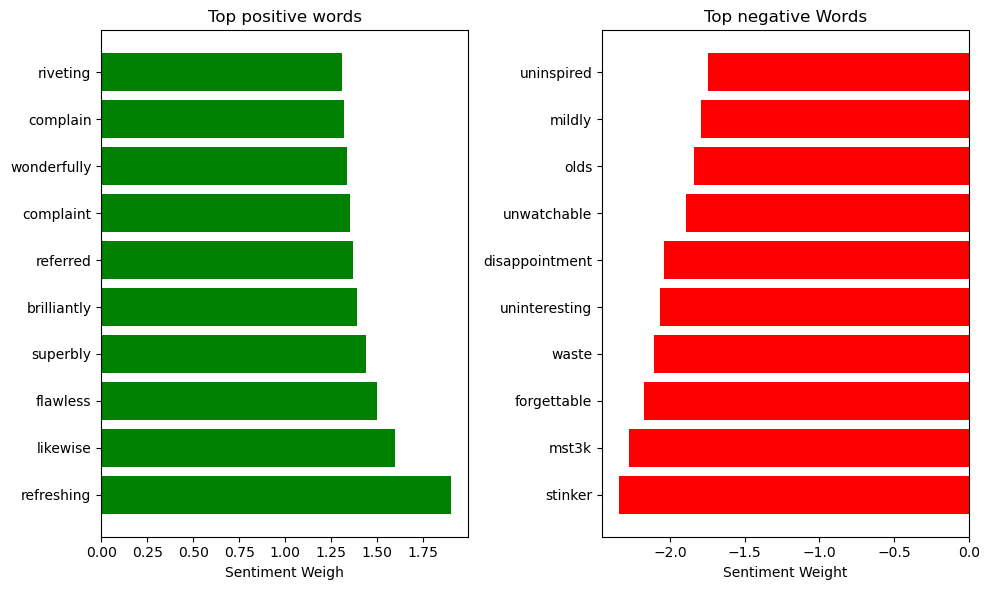

In [9]:
# plot top positive/negative words
plt.figure(figsize=(10,6))

# positive words
plt.subplot(121)
plt.barh(most_positive['word'], most_positive['weight'], color='green')
plt.title('Top positive words')
plt.xlabel('Sentiment Weigh')

# negative words
plt.subplot(122)
plt.barh(most_negative['word'], most_negative['weight'], color='red')
plt.title('Top negative Words')
plt.xlabel('Sentiment Weight')

plt.tight_layout()
plt.show()